
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:


*  apply K-Fold cross validation method 
*  tune the hyperparameters of the MLP Classifier.

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/module_2_week_8_experment_5.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description:

The MNIST dataset contains: 

1. 60,000 Handwritten digits as training samples and 10,000 Test samples, 
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately). 
2. Each image is Size Normalized and Centered 
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value. 
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.



### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license. 

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.


### Challenges

Now, if you notice the images below, you will find that between 2 characters there are always certain similarities and differences. To teach a machine to recognize these patterns and identify the correct output.

![altxt](https://www.researchgate.net/profile/Radu_Tudor_Ionescu/publication/282924675/figure/fig3/AS:319968869666820@1453297931093/A-random-sample-of-6-handwritten-digits-from-the-MNIST-data-set-before-and-after.png)

Hence, all these challenges make this a good problem to solve in Machine Learning.


## Domain Information

Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)


## AI /ML Technique

### K-Fold Cross Validation


The problem with machine learning models is that you won’t get to know how well a model performs until you test it's performance on an independent data set (the data set which was not used for training the machine learning model).

Cross Validation comes in to picture here and helps us to estimate the performance of our model. One type of cross validation is the K-Fold Cross Validation

In our experiment, we are using K-Fold Cross Validation  technique to reduce (limit) the problem of overfitting. K-Fold Cross Validation is a way to evaluate and improve the performance of our machine learning model. It helps to prevent from overfitting to a single train or test split. 


When we are given a machine learning problem, we will be given two types of data sets — known data (training data set) and unknown data (test data set). By using cross validation, you would be “testing” your machine learning model in the “training” phase to check for overfitting and to get an idea about how your machine learning model will generalize to independent data, which is the test data set given in the problem.


In first round of cross validation, we have to divide our original training data set into two parts:

1. Cross validation training set
2. Cross validation testing set or Validation set

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/K-Fold.png)

The above image represents how the K-Fold Cross Validation works. We divide the dataset in to "K'' parts and will use the K-1 parts for training and remaining 1 for testing. We will rotate the test set and repeat the process for "K" times. 

we will train our machine learning model on the cross validation training set and test the model’s predictions against the validation set. we will get to know how accurate our machine learning model’s predictions are when we compare the model’s predictions on the validation set and the actual labels of the data points in the validation set.

To reduce the variability, multiple rounds of cross validation are performed by using different cross validation training sets and cross validation testing sets. The results from all the rounds are averaged to estimate the accuracy of the machine learning model.

**K-fold cross validation is performed as per the following steps:**

1. Randomly split the entire training dataset into k subsets.
2. Reserve one block as our test data
3. Train on each of the remaining K-1 blocks
4. Measure the performance against the test set
5. The average of our K recorded errors is called the cross-validation error and it will be used as a performance metric for the model



### Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook  
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U3W14_26_Kfold_Validation_B" #name of the notebook
def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing the packages

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset from sklearn package

In [5]:
# Loading MNIST dataset 
digits = datasets.load_digits(n_class=10)

# Loding the data and storing in x
X = digits.data

# Loading the target data and storing it in y
y = digits.target

###  K-Fold Cross-Validation from Sklearn

In [6]:
# Applying K-Folds cross-validator with no of splits is 4
kf = KFold(n_splits=4)
print(kf)

KFold(n_splits=4, random_state=None, shuffle=False)


### Defining Hyper parameters of MLP

In [7]:
# Activation Functions
a = ["identity","logistic","tanh","relu"]

# Solvers (Optimizers)
s = ["lbfgs","sgd","adam"]

# Learning Rate
lr = [0.0001,0.001,0.01,0.1]

# Hidden Layers and number of nodes in each layer
h = [(5,2),(3,2),(6,3),(7,2)]

### Apply the MLP Classifier

In [8]:
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a, solver= s ,hidden_layer_sizes= h, learning_rate_init= lr) # YOUR CODE HERE : Explore and Create a 'MLPclassifier' (from SkLearn) object with hyper parameters
    return clf  
  
def accuracy(actual,predicted):
    return accuracy_score(actual, predicted) # YOUR CODE HERE : Calculate the 'accuracy_score' (from SkLearn)

### Calculating Training and Testing accuracies

In [10]:
test_accuracy = []
train_accuracy = []

for i in range(10):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1], "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3], "\n hidden_layer_sizes = ", h[k4])

    # Calling the mlp function with random hyper paramters
    clf = mlp(a[k1], s[k2], h[k4], lr[k3])

    tempTrain = 0
    tempTest = 0

    for nbrOfFolds,(train_index, test_index) in enumerate(kf.split(X)):

        # Split the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test  = y[train_index], y[test_index]

        # Fit the data into the model
        clf.fit(X_train,Y_train)

        # Predict the values on the fitted model using train data
        predTrain = clf.predict(X_train)

        # Calculating the train accuracy and adding to tempTrain
        tempTrain = tempTrain + accuracy(Y_train, predTrain)

        # Predict the values on the fitted model using test data
        predTest = clf.predict(X_test)

        # Calculating the test accuracy and adding to tempTest
        tempTest = tempTest + accuracy(Y_test, predTest)

    # Calculating the train accuracy
    print("Number of folds is", nbrOfFolds + 1)
    train_accuracy.append(tempTrain*1.0/(nbrOfFolds+1))

    # Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/(nbrOfFolds+1))
    
    print("(train,test) accuracy = ",tempTrain*1.0/(nbrOfFolds+1), tempTest*1.0/(nbrOfFolds+1))


Hyper-parameters = 
 activation =  identity 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (5, 2)
Number of folds is 4
(train,test) accuracy =  0.7879756421016921 0.7145335313041327

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (5, 2)
Number of folds is 4
(train,test) accuracy =  0.41769475083656615 0.38853377876763184

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (3, 2)
Number of folds is 4
(train,test) accuracy =  0.25877513278215797 0.23259341747092305

Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)
Number of folds is 4
(train,test) accuracy =  0.33220116028805635 0.29441722345953975

Hyper-parameters = 
 activation =  identity 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)
Number of folds is 4
(train,test) accuracy = 

### Plotting the Train and Test Accuracy

TypeError: ignored

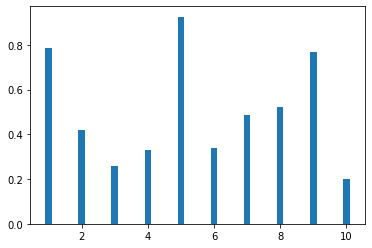

In [11]:
xx = np.array(range(1,11))
plt.bar(xx,train_accuracy,width=0.2)
plt.bar(#YOUR CODE HERE : Now plot test_accuracy beside each of the train_accuracy bars (hint: add a small fractional value to xx)
)
plt.legend(["Train","Test"])
plt.show()

### Ungraded Exercise 

Vary the number of k-fold splits and observe the changes

In [ ]:
# YOUR CODE HERE

### Please answer the questions below to complete the experiment:

In [12]:
#@title State True or False: K-fold cross validation helps in overcoming overfitting problem? { run: "auto", form-width: "500px", display-mode: "form" }
Answer= "TRUE" #@param ["","TRUE","FALSE"]


In [13]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [14]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nn" #@param {type:"string"}


In [15]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [16]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [17]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [18]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [19]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 11677
Date of submission:  18 Dec 2020
Time of submission:  11:29:10
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
